<a href="https://colab.research.google.com/github/gebakx/notebooks/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris

## loading data

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dt = pd.read_csv('/content/drive/My Drive/dades/iris.data.txt')

## browsing data 
(do not include in the final notebook)

In [0]:
dt.shape

(150, 5)

In [0]:
dt.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
dt.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
dt.loc[100:105]

,sepal-length,sepal-width,petal-length,petal-width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica


In [0]:
dt.loc[100:105,('sepal-length','class')]

,sepal-length,class
100,6.3,Iris-virginica
101,5.8,Iris-virginica
102,7.1,Iris-virginica
103,6.3,Iris-virginica
104,6.5,Iris-virginica
105,7.6,Iris-virginica


In [0]:
dt.iloc[:3,2:]

,petal-length,petal-width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa


In [0]:
dt[dt['class']=='Iris-setosa'][:10]

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## validation
- Shuffle
- 67% training / 33% test 

In [0]:
ths = 100

In [0]:
from sklearn.utils import shuffle
dt = pd.DataFrame(shuffle(dt))
dt.head()

,sepal-length,sepal-width,petal-length,petal-width,class
109,7.2,3.6,6.1,2.5,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica
2,4.7,3.2,1.3,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa


In [0]:
type(dt)

pandas.core.frame.DataFrame

## graphical representation

In [0]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)
Xp = pd.DataFrame(pca.fit_transform(dt.iloc[:ths,:-1]))

In [0]:
Xp.head()

,0,1
0,3.041640,0.695892
1,0.609371,-1.227629
2,2.281073,0.155552
3,-2.778784,-0.102372
4,-2.477721,-0.161554


In [0]:
Y = pd.Series(dt.iloc[:ths,-1],name='class')
Y.index = range(ths)
Y.head()

0    Iris-virginica
1    Iris-virginica
2    Iris-virginica
3       Iris-setosa
4       Iris-setosa
Name: class, dtype: object

In [0]:
Xp.loc[:,'class'] = Y
Xp.head()

,0,1,class
0,3.041640,0.695892,Iris-virginica
1,0.609371,-1.227629,Iris-virginica
2,2.281073,0.155552,Iris-virginica
3,-2.778784,-0.102372,Iris-setosa
4,-2.477721,-0.161554,Iris-setosa


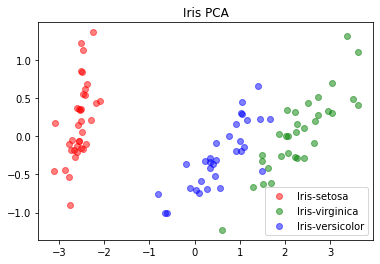

In [0]:
names = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
plt.figure()
for n, c in zip(names, 'rgb'):
    x0 = Xp[Xp['class']==n].loc[:,0]
    x1 = Xp[Xp['class']==n].loc[:,1]
    plt.scatter(x0, x1, c=c, label=n, alpha=0.5)
plt.legend()
plt.title('Iris PCA')
plt.show()

## clasification

In [0]:
from sklearn.metrics import accuracy_score

def clasificación(clf, msg):
    print(msg)
    clf.fit(dt.iloc[:ths,:-1],dt.iloc[:ths,-1])
    preds = pd.Series(clf.predict(dt.iloc[ths:,:-1]), name='preds')
    reals = pd.Series(dt.iloc[ths:,-1],name='reals')
    reals.index = range(50)
    print('acc:', accuracy_score(reals, preds))
    print(pd.crosstab(reals,preds))

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clasificación(KNeighborsClassifier(3), '3NN')

3NN
acc: 0.94
preds            Iris-setosa  Iris-versicolor  Iris-virginica
reals                                                        
Iris-setosa               14                0               0
Iris-versicolor            0               16               2
Iris-virginica             0                1              17


In [0]:
from sklearn.neighbors import NearestCentroid
clasificación(NearestCentroid(), 'Centroids')

Centroids
acc: 0.88
preds            Iris-setosa  Iris-versicolor  Iris-virginica
reals                                                        
Iris-setosa               14                0               0
Iris-versicolor            0               17               1
Iris-virginica             0                5              13


In [0]:
from sklearn.naive_bayes import GaussianNB
clasificación(GaussianNB(), 'GNB')

GNB
acc: 0.9
preds            Iris-setosa  Iris-versicolor  Iris-virginica
reals                                                        
Iris-setosa               14                0               0
Iris-versicolor            0               16               2
Iris-virginica             0                3              15
